In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [4]:
df.drop(['Gender'], axis=1)

Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
9995  66.172652  136.777454
9996  67.067155  170.867906
9997  63.867992  128.475319
9998  69.034243  163.852461
9999  61.944246  113.649103

[10000 rows x 2 columns]

In [5]:
df.style.format({
    'Height': '{:,.0f}'.format,
    'Weight': '{:,.0f}'.format,
})

In [30]:
df.style.format({
    'Height': '{:,.0f}'.format,
    'Weight': '{:,.0f}'.format,
})

In [6]:
df.drop('Gender', inplace=True, axis=1)

In [7]:
df

Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
9995  66.172652  136.777454
9996  67.067155  170.867906
9997  63.867992  128.475319
9998  69.034243  163.852461
9999  61.944246  113.649103

[10000 rows x 2 columns]

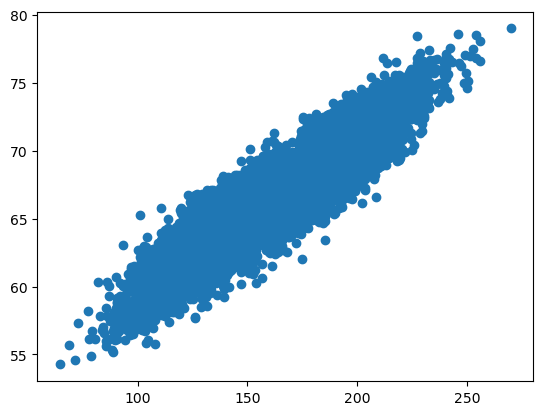

In [8]:
plt.scatter(df['Weight'],df['Height'])

Text(0, 0.5, 'Height')

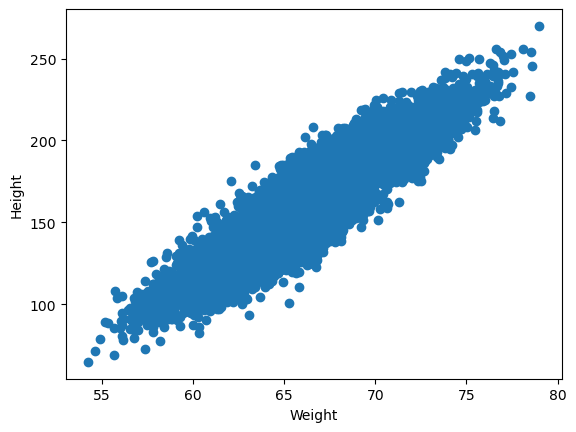

In [9]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
## Correlation
df.corr()

Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000

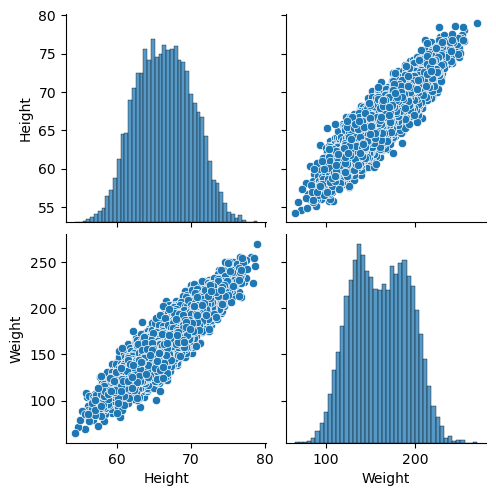

In [11]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [12]:
## Independent and Dependent Features
X=df['Weight' ] ### independent feature should be data Frame or 2 DimensionalArray
Y=df['Height'] ### this variable can be in series or 1d array

type(df)

pandas.core.frame.DataFrame

In [13]:
##Independent and Dependent Features
X=df[['Weight']]
np.array(X)

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [14]:
# To Know how many rows we have
np.array(X).shape

(10000, 1)

In [15]:
#but if we go through dataframe....

#Never take in this way
#let train this model as well as above let see where we get error
X_series=df['Weight']
np.array(X_series).shape

(10000,)

In [16]:
Y


0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [17]:
np.array(Y).shape

(10000,)

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [20]:
X_train.shape

(7500, 1)

In [21]:
Y_train.shape

(7500,)

In [22]:
 ## Standardization
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test) 

In [25]:
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]])

In [26]:
## Apply Simple linear Regression

from sklearn.linear_model import LinearRegression

In [27]:
regression= LinearRegression()

In [30]:
regression.fit(X_train,Y_train)


LinearRegression()

In [32]:
regression.coef_

array([3.5520765])

In [33]:
print("Cofficient or slope:",regression.coef_)
print("Intercept",regression.intercept_)

Cofficient or slope: [3.5520765]
Intercept 66.34834766149207


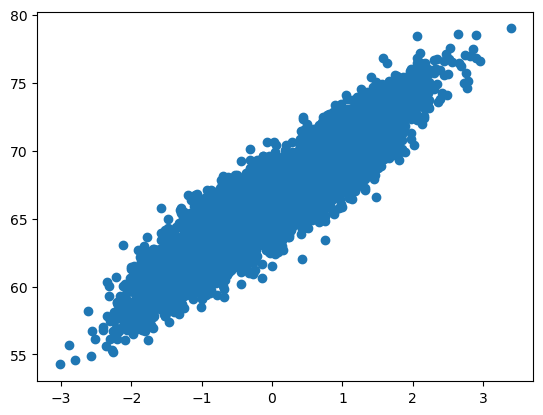

In [34]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)

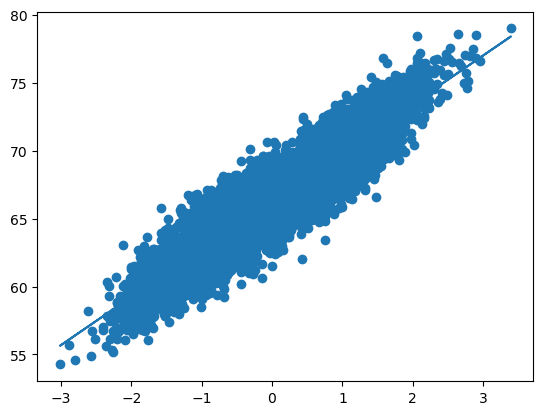

In [35]:
# now i am oredicting the value...along with straight line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

 ### Prediction of test data
 1. predicted height output = intercept + coef_(Weight)
 2. y_pred_test = 156.470 + 17.29(X_test)

In [36]:
## prediction of test data
y_pred = regression.predict(X_test)


In [38]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse  = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1245002931280457
1.1618686241050298
1.4575665655907608


## R square

formula 
### R^2 = 1-SSR/SST
R^2 = cofficient of determination SSR= sum of square of residuals SST = Total sum of Squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(Y_test,y_pred)
print(score)

0.857428881104187


## Adjusted R Square

formula
#### Adjusted R2 = 1- [(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variable

In [44]:
#display adjusted R-square
1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8573718069973433

### lets try OLS linear regression 

In [45]:
## OLS  linear Regression
import statsmodels.api as sm

In [46]:
model = sm.OLS(Y_train,X_train).fit()

In [49]:
prediction = model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [ ]:
## lets do one thind...i will going to print my model summary over here in OLS
## and see weathe i am getting the same thing what i did with help of linear 
## linear regression using gredient descent

In [51]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                    3.63e-06
Time:                        10:15:53   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction for new_data

In [53]:
# predicting new height with giving new weight
regression.predict(scaler.transform([[72]]))

C:\Users\91999\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45016021])